In [1]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt 
from pathlib import Path

torch.manual_seed(17)

In [19]:
orig_img = Image.open(Path("assets")/"cat.png")

def plot(imgs,with_orig=True,**imshow_kwargs):
    
    if not isinstance(imgs[0],list):
        imgs = [imgs]
    num_rows =len(imgs)
    num_cols = len(imgs[0]) + with_orig
   
    fig,axs = plt.subplots(nrows=num_rows,ncols=num_cols,squeeze=False)
    for row_idx, row in enumerate(imgs):
        row =[orig_img]+row if with_orig else row
     
        for col_idx,img in enumerate(row):
            ax = axs[row_idx,col_idx]
           
            ax.imshow(np.asarray(img),**imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    if with_orig:
        axs[0,0].set(title="Original image")
    plt.tight_layout()


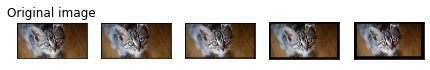

In [21]:
padded_imgs =[T.Pad(padding=pad)(orig_img) for pad in (3,10,30,50)]
plot([padded_imgs])

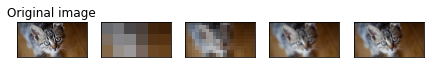

In [22]:
padded_imgs =[T.Resize(size=size)(orig_img) for size in (3,10,30,50)]
plot([padded_imgs])

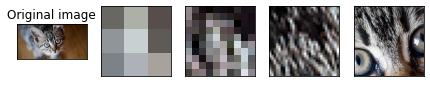

In [26]:
padded_imgs =[T.CenterCrop(size=size)(orig_img) for size in (3,10,30,200)]
plot([padded_imgs])

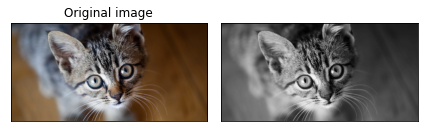

In [29]:
padded_imgs =[T.Grayscale()(orig_img)]
plot([padded_imgs],cmap="gray")